# <font color=green> Exploratory Data Analysis on Facebook Utilization Data </font>

In [189]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ("ignore")

In [209]:
data=pd.read_csv("E:/show time consulting/facebook user data - facebook user data.csv")

In [210]:
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [211]:
data.shape

(99003, 15)

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [213]:
data.drop(columns=["dob_day","dob_year", "dob_month"],inplace=True)

In [214]:
age_grp=['13-19','20-30','31-40','41-50','51-65','Over 65']
data['age_group']=pd.cut(data.age,bins=[12,19,30,40,50,65,data.age.max()],labels=age_grp,include_lowest=True)
data.age_group.value_counts()

20-30      32415
13-19      20983
51-65      13196
31-40      12491
Over 65    10950
41-50       8968
Name: age_group, dtype: int64

In [215]:
#conversion of tenure in years
data["tenure_in_years"]=data["tenure"].apply(lambda x:x/365)

labels=['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7years','Over 7years']


data['tenure_year_group']=pd.cut(data["tenure_in_years"],bins=[0,1,2,3,4,5,6,7,8],labels=labels,include_lowest=True)

In [216]:
data.tenure_year_group.value_counts()

0-1 year       43658
1-2 years      33366
2-3 years       9860
3-4 years       5448
4-5 years       4557
5-6 years       1507
6-7years         581
Over 7years       15
Name: tenure_year_group, dtype: int64

### <font color=blue> Missing Value Treatment </font>

In [217]:
data.isnull().sum()

userid                     0
age                        0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
age_group                  0
tenure_in_years            2
tenure_year_group         11
dtype: int64

### <font color=purple> 1) Load the data and impute missing values: Imputation of missing values:</font>
   ### <font color=purple> ● Replace the null values (NA) of gender column with its mode or median and explain why mode/median used to replace NA values.</font>   

Facing missing values in real life project is very much common. Missing values affect the performance of our model along with its predictive capacity. NA values have that capacity to change all the statistical parameters of our project which will lead to bad performance of our model and we wolud not be able to reach our desired accuracy.

In [218]:
data["gender"].value_counts()

male      58574
female    40254
Name: gender, dtype: int64

As gender here is acategorical column, there is no mean nor median, so in these type of cases our best option to use the mode (the most frequent value).Mode is the most frequent value in our data set. Mode is thus used to impute missing values in columns which are categorical in nature. Also mode is the values that reflects the central tendency better than mean or median. Mode is also not influenced by outliers. 

After mode, it is the median that reflects the central tendency the best. Which implies that for continuous data, the use of the median is better than mean. Median is the middle score of data-points when arranged in order.

In [219]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy= 'most_frequent')
data["gender"]=imp.fit_transform(data["gender"].values.reshape(-1,1))

In [220]:
data["gender"].isnull().sum()

0

### <font color=purple> ● Replace the null values (NA) of tenure column (numerical variable) with its median, and explain why mode/median used to replace NA values</font>

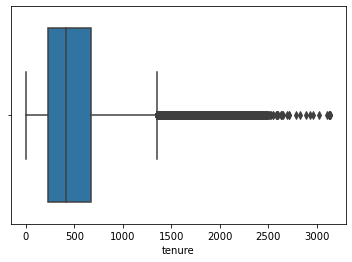

In [229]:
import seaborn as sns
#
# Box plot
#
sns.boxplot(data['tenure'])
plt.savefig("Boxplot_of_tenure.png")

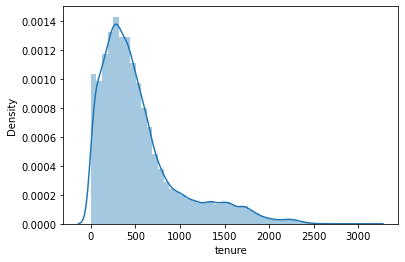

In [230]:
# Distribution plot
sns.distplot(data['tenure'])
plt.savefig("Distplot_of_tenure.png")



From the above box plot and distribution plot, we may note that the data is skewed. There are several or large number of data points which act as outliers. Outliers data points will have significant impact on the mean and hence, in such cases, it is not recommended to use mean for replacing the missing values. Using mean value for replacing missing values may not create a great model and hence gets ruled out.

So in this case it's better to use median to replace NA values. 


In [223]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy= 'median')
data["tenure"]=imp.fit_transform(data["tenure"].values.reshape(-1,1))

In [224]:
data["tenure"].isnull().sum()

0

### <font color="purple">2) Plot heatmap / correlation matrix on all the columns.</font>

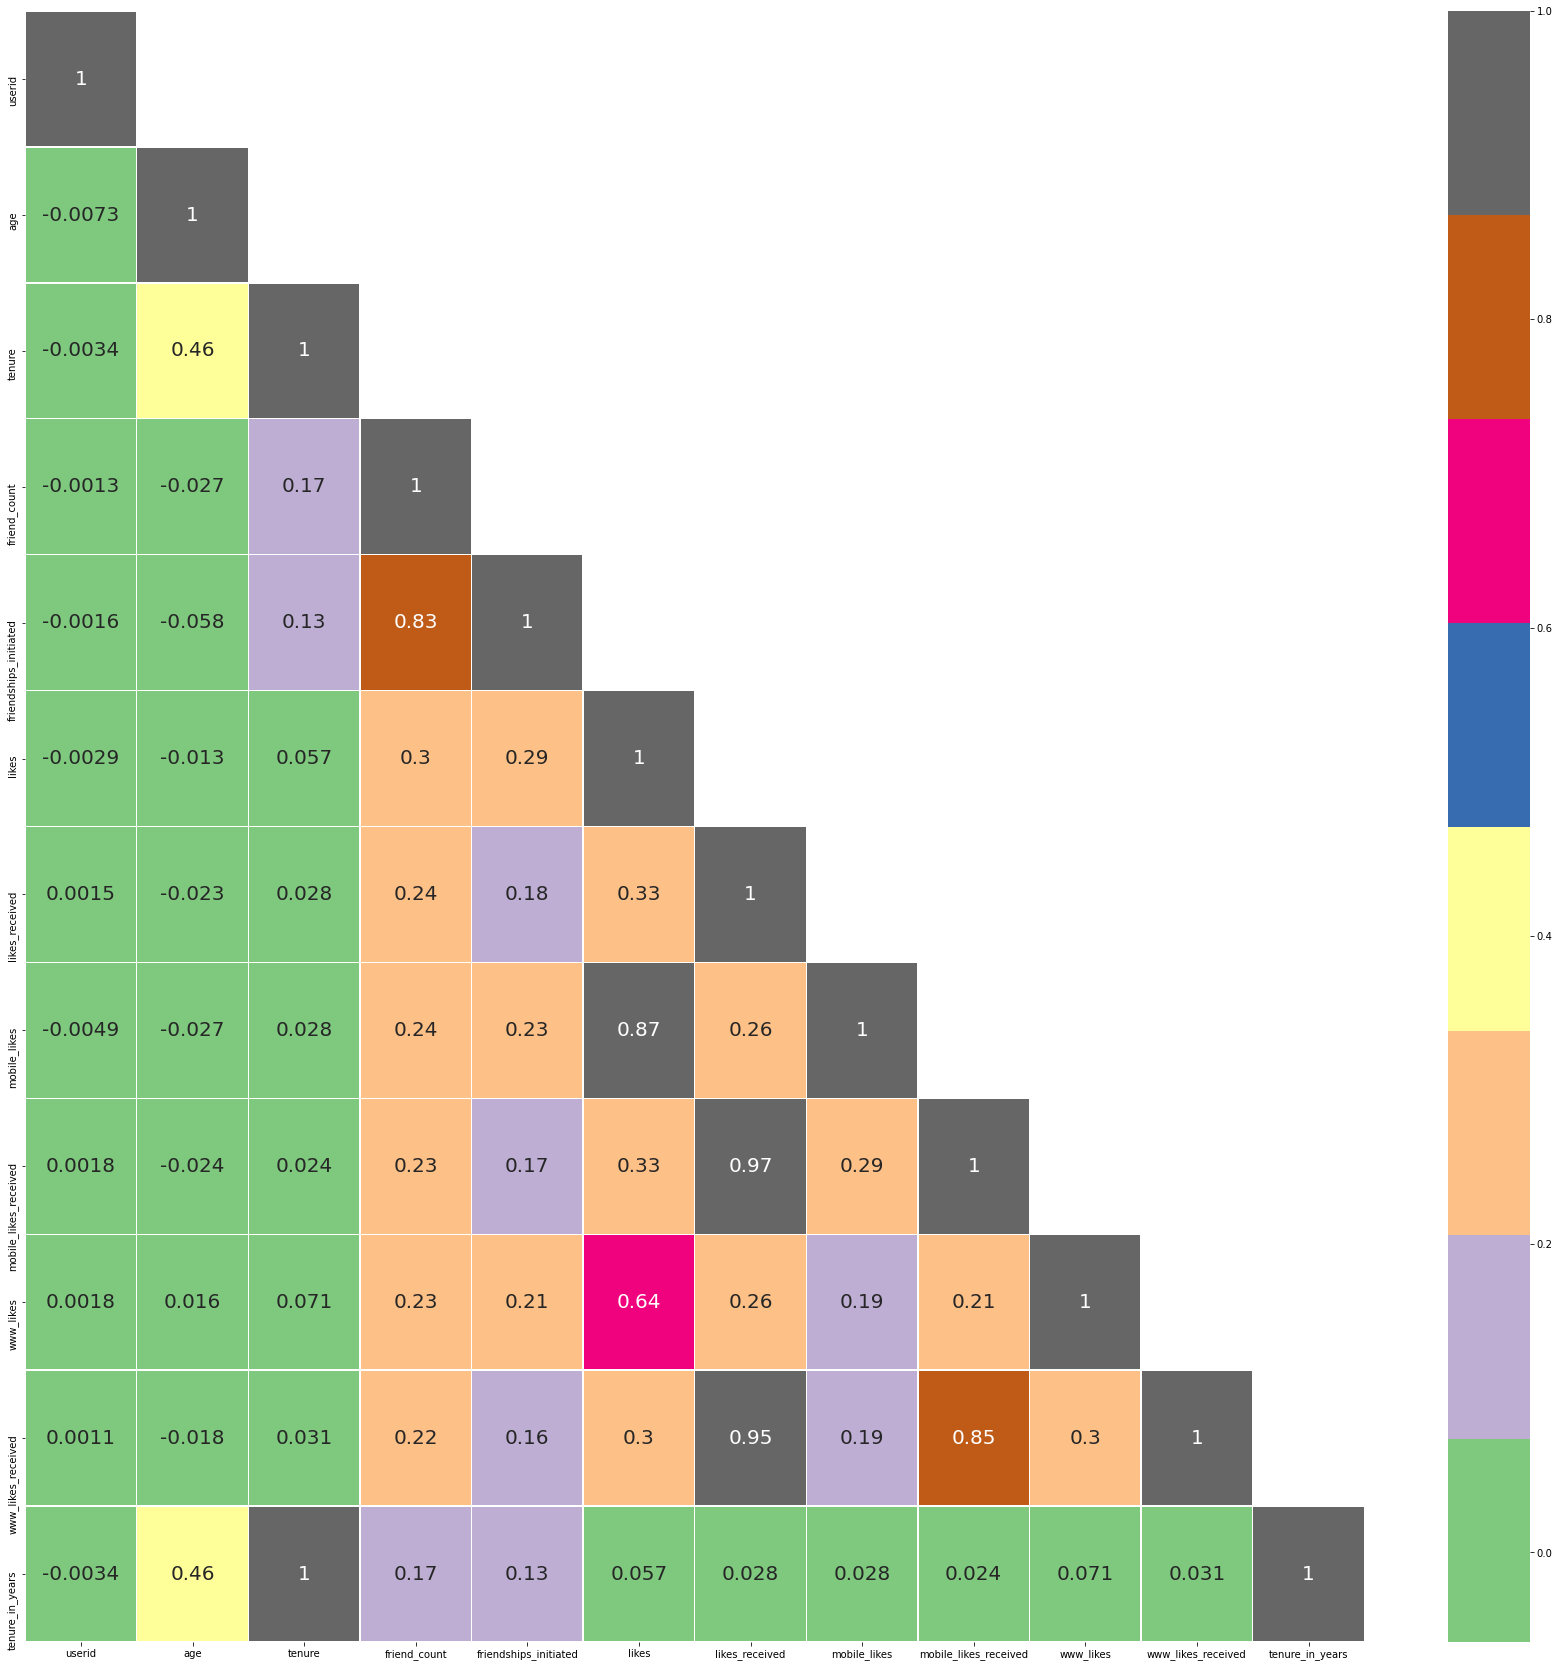

In [231]:
corrmat=data.corr()
plt.figure(figsize=(30,30))
m=np.ones_like(corrmat)
m[np.tril_indices_from(m)]=0
sns.heatmap(corrmat, annot=True, linewidths=.3, cmap="Accent", mask=m, annot_kws={'size':20})
plt.savefig("Heatmap_fbdata.png")
plt.show()

### <font color="purple">3) Analysis based on gender of the users</font>



### <font color="purple"> ● What is composition of male and female users? </font>

In [226]:
data.pivot_table(values=['mobile_likes_received','mobile_likes','www_likes_received','www_likes'],index='age_group',columns='gender')

mobile_likes            mobile_likes_received             \
gender          female       male                female       male   
age_group                                                            
13-19       252.705882  70.320013            268.447927  53.660676   
20-30       173.147061  59.333318            176.247391  38.967173   
31-40       174.898677  46.419198            106.549275  27.672434   
41-50       176.355380  55.958110             97.832104  32.929124   
51-65       128.304779  53.287714             67.683875  30.002116   
Over 65      99.435665  72.125447             70.300099  56.791830   

            www_likes            www_likes_received             
gender         female       male             female       male  
age_group                                                       
13-19      130.807257  31.735004         192.109330  35.382675  
20-30       63.642558  17.432742         107.332917  24.388878  
31-40       50.029437  10.934897          68.240614  16.462514  
41-50       76.554821  17.002184          80.625032  21.411952  
51-65      105.856900  34.778031          71.142817  25.751017  
Over 65     84.136355  47.975830          52.047094  40.522383

In [227]:
gen=pd.DataFrame(data.gender.value_counts())
gen=gen.transpose()

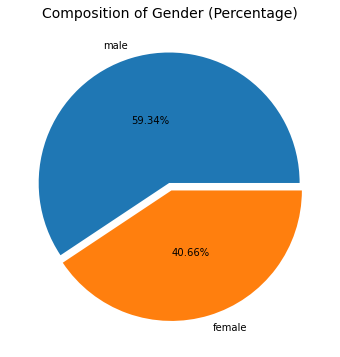

In [232]:
pie, ax = plt.subplots(figsize=[6,6])
labels = gen.keys()
plt.pie(x=gen.values[0], autopct="%.2f%%", explode=[0.03]*len(gen.values[0]), labels=labels, pctdistance=0.5)
plt.title("Composition of Gender (Percentage)", fontsize=14);
plt.savefig("gender.png")
plt.show()

### <font color="purple"> ● Which category of gender has more friends? </font>

In [237]:
df=pd.DataFrame(data.groupby('gender')[["friend_count"]].sum())

In [238]:
df["Gender"]=["Female", "Male"]

In [253]:
data.pivot_table(values=['friend_count','friendships_initiated'],
                 columns='gender')

gender,female,male
friend_count,241.969941,165.093176
friendships_initiated,113.899091,103.035337


In [262]:
data.groupby("gender")[["friend_count"]].aggregate(['count','sum','mean'])

friend_count                     
              count      sum        mean
gender                                  
female        40254  9740258  241.969941
male          58749  9699059  165.093176

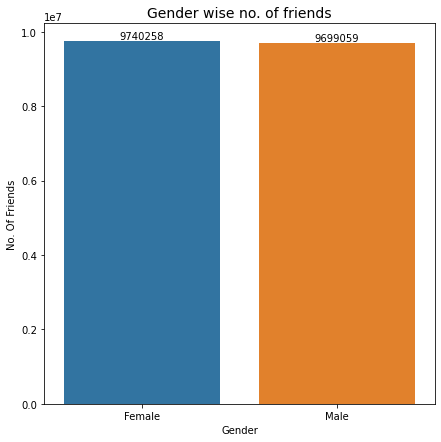

In [240]:
plt.figure(figsize=(7,7))
ax=sns.barplot(df.Gender,df.friend_count)
from matplotlib import pyplot as plt

rects=ax.patches
labels=df.friend_count
for rect,label in zip(rects, labels):
    height=rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2,height+6, label, ha= 'center', va="bottom")
    
    


plt.xlabel("Gender")
plt.ylabel("No. Of Friends")
plt.title("Gender wise no. of friends", fontsize=14)
plt.savefig("frnd_gender.png")
plt.show()

### <font color="purple"> ● Which category of gender initiated more friendships?</font>

In [264]:
data.groupby("gender")[["friendships_initiated"]]
.aggregate(['count','sum','mean'])

friendships_initiated                     
                       count      sum        mean
gender                                           
female                 40254  4584894  113.899091
male                   58749  6053223  103.035337

In [249]:
df2=pd.DataFrame(data.groupby('gender')[["friendships_initiated"]].sum())
df2

,friendships_initiated
gender,
female,4584894
male,6053223


In [250]:
df2["Gender"]=["Female", "Male"]

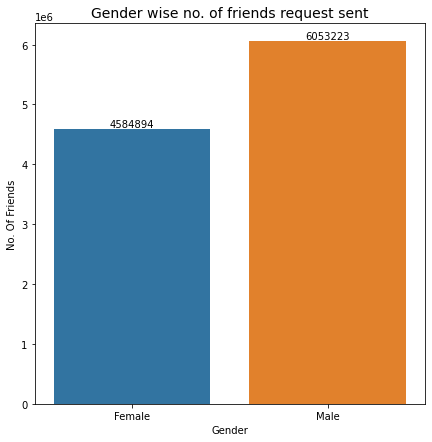

In [251]:
plt.figure(figsize=(7,7))
ax=sns.barplot(df2.Gender,df2.friendships_initiated)
from matplotlib import pyplot as plt

rects=ax.patches
labels=df2.friendships_initiated
for rect,label in zip(rects, labels):
    height=rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2,height+6, label, ha= 'center', va="bottom")
    
    


plt.xlabel("Gender")
plt.ylabel("No. Of Friends")
plt.title("Gender wise no. of friends request sent", fontsize=14)
plt.savefig("frnd_req_gen")
plt.show()

### <font color="purple">● What is the distribution of tenure across different categories of gender?</font>

In [266]:
data.groupby("gender")[["tenure"]].aggregate(['count','sum','mean'])

tenure                        
        count         sum        mean
gender                               
female  40254  23637975.0  587.220525
male    58749  29614237.0  504.080699

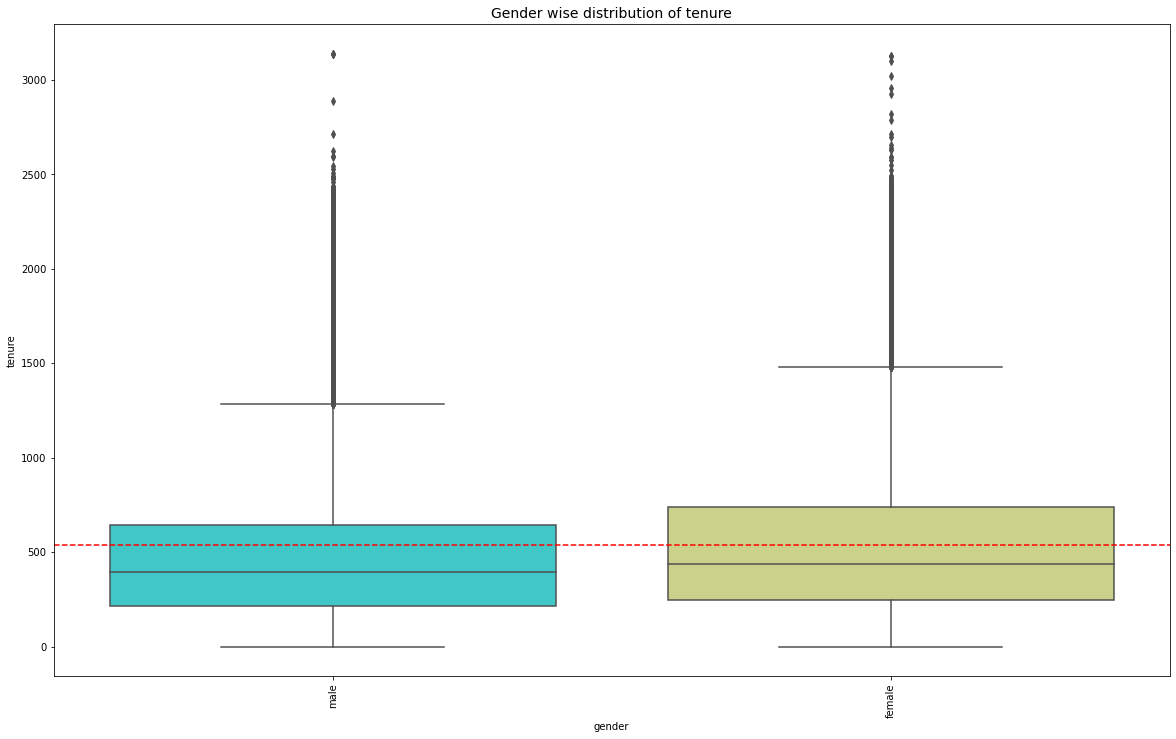

In [265]:
import seaborn as sns
plt.figure(figsize=(20,12))
mean_tenure=np.mean(data["tenure"])
sns.boxplot(x="gender", y="tenure", data=data, palette="rainbow")
plt.axhline(mean_tenure, color="red", linestyle="dashed", label="Mean Tenure")
plt.title("Gender wise distribution of tenure", fontsize=14)
plt.xticks(rotation="vertical")
plt.savefig("dist_ten.png")
plt.show()

### <font color="purple">4) Analysis based on the least active users on Facebook


### <font color="purple">● How many users have no friends?</font>

In [274]:
data1= data[data["friend_count"]==0]
data1.shape[0]
data1.to_csv("Users with no friends.csv")

<font color="blue"> In our dataset there are 1962 users don't have any no. of friends. </font> 

In [270]:
data1.gender.value_counts()

male      1459
female     503
Name: gender, dtype: int64

In [273]:
data1.groupby("gender")[["friendships_initiated"]].aggregate(['count','sum','mean'])

friendships_initiated         
                       count sum mean
gender                               
female                   503   0    0
male                    1459   0    0

In [282]:
data1.age_group.value_counts()

20-30      795
31-40      381
13-19      341
41-50      205
51-65      178
Over 65     62
Name: age_group, dtype: int64

### <font color="purple"> ● How many users did not like any posts? </font> 

In [275]:
data2=data[data["likes"]==0]
data2.shape[0]

22308

In [276]:
data2.gender.value_counts()

male      16719
female     5589
Name: gender, dtype: int64

In [277]:
data2.groupby("gender")[["friend_count"]].aggregate(['count','sum','mean'])

friend_count                    
              count      sum       mean
gender                                 
female         5589   461541  82.580247
male          16719  1288556  77.071356

In [279]:
data2.groupby("gender")[["tenure"]].aggregate(['count','sum','mean'])

tenure                      
        count        sum       mean
gender                             
female   5589  2495572.0  446.51494
male    16719  7494531.0  448.26431

In [283]:
data2.age_group.value_counts()

20-30      8475
13-19      4549
31-40      3295
51-65      2352
41-50      1993
Over 65    1644
Name: age_group, dtype: int64

In [278]:
data2.to_csv("Users_did_not_like_any_post.csv")

<font color="blue"> In our dataset there are 22308 users did not like any post. </font> 

### <font color="purple"> ● How many users did not receive any likes? </font> 

In [280]:
data3=data[data["likes_received"]==0]
data3.shape[0]

24428

<font color="blue"> In our dataset there are 24428 users did not receive any like for their post. </font> 

In [288]:
data3.gender.value_counts()

male      18188
female     6240
Name: gender, dtype: int64

In [289]:
data3.groupby("gender")[["friend_count"]]
.aggregate(['count','sum','mean'])

friend_count                    
              count      sum       mean
gender                                 
female         6240   377656  60.521795
male          18188  1233997  67.846767

In [291]:
data3.groupby("gender")[["friendships_initiated"]].aggregate(['count','sum','mean'])

friendships_initiated                   
                       count     sum       mean
gender                                         
female                  6240  205030  32.857372
male                   18188  820270  45.099516

In [292]:
data3.groupby("gender")[["tenure"]].aggregate(['count','sum','mean'])

tenure                       
        count        sum        mean
gender                              
female   6240  2728119.0  437.198558
male    18188  7751579.0  426.191940

In [284]:
data3.age_group.value_counts()

20-30      9182
13-19      5031
31-40      3615
51-65      2632
41-50      2233
Over 65    1735
Name: age_group, dtype: int64

In [293]:
data3.to_csv("Users_zero_likes_received.csv")

### <font color="purple">5) Analysis based on the user accessibility (Mobile Devices vs. Web Devices)
</font>

### <font color="purple">● What is the average number of posts liked by users (based on gender) through web vs. mobile devices.</font>

In [312]:
df=pd.DataFrame(data.groupby('gender')[["mobile_likes","www_likes"]].mean())

In [313]:
df["Gender"]=["Female", "Male"]

In [314]:
df

,mobile_likes,www_likes,Gender
gender,,,
female,172.912928,87.138297,Female
male,60.348176,24.490034,Male


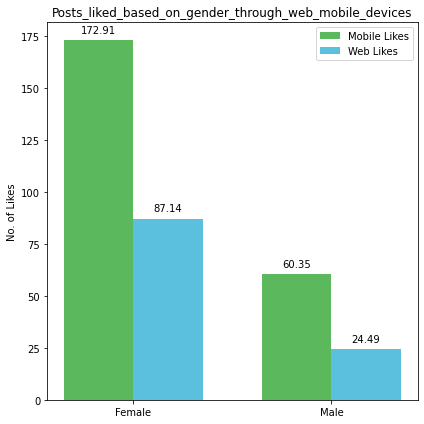

In [316]:
import matplotlib.pyplot as plt
import numpy as np


labels = df.Gender
mobile_likes = df.mobile_likes
www_likes = df.www_likes

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 6))
rects1 = ax.bar(x - width/2, mobile_likes, width, label='Mobile Likes', color='#5cb85c')
rects2 = ax.bar(x + width/2, www_likes, width, label='Web Likes', color='#5bc0de')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Likes')
ax.set_title('Posts_liked_based_on_gender_through_web_mobile_devices')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#annotate bar plot with values
for p in ax.patches:
    ax.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    
fig.tight_layout()
plt.savefig("Posts_liked_based_on_gender_through_web_mobile_devices.png")
plt.show()

In [295]:
data_mob=data[data["mobile_likes"]!=0]
data_mob.shape[0]

63947

In [296]:
data_mob.gender.value_counts()

male      34472
female    29475
Name: gender, dtype: int64

In [297]:
data_mob.groupby("gender")[["tenure"]]
.aggregate(['count','sum','mean'])

tenure                        
        count         sum        mean
gender                               
female  29475  17736790.0  601.757082
male    34472  17775738.0  515.657287

In [317]:
data_mob.to_csv("Data_wit_mobile_likes.csv")

In [305]:
data_www=data[data["www_likes"]!=0]
data_www.shape[0]

38004

In [306]:
data_www.gender.value_counts()

female    19074
male      18930
Name: gender, dtype: int64

In [308]:
data_www.groupby("gender")[["tenure"]].aggregate(['count','sum','mean'])

tenure                        
        count         sum        mean
gender                               
female  19074  13340321.0  699.398186
male    18930  11501788.0  607.595774

In [319]:
data_www.to_csv("Data_wit_web_likes.csv")

In [310]:
data_mob_web=data[(data["mobile_likes"]!=0) & (data["www_likes"]!=0)]
data_mob_web.shape

(25256, 15)

In [320]:
data_mob_web.to_csv("Data_with_both_likes.csv")

<font color="blue"> There are 25256 posts have been liked through both the services.</font>

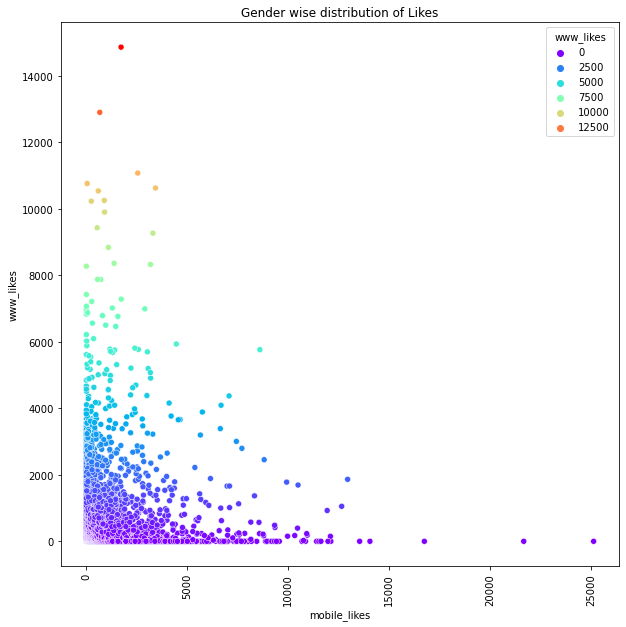

In [174]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="mobile_likes", y="www_likes", hue="www_likes", data=data, palette="rainbow")
plt.title("Gender wise distribution of Likes")
plt.xticks(rotation="vertical")
plt.show()

### <font color="purple"> ● What is the average number of likes received by users (based on gender) through web vs. mobile devices </font>

In [322]:
df=pd.DataFrame(data.groupby('gender')[["mobile_likes_received", "www_likes_received"]].mean())

In [323]:
df["Gender"]=["Female", "Male"]

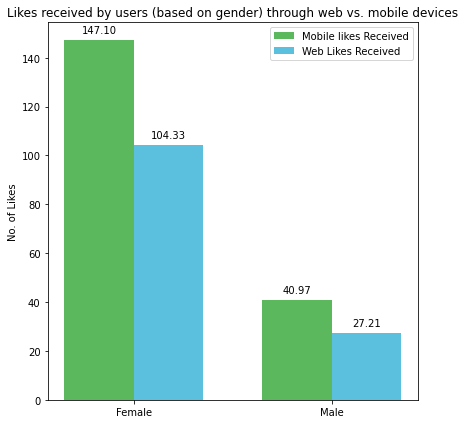

In [325]:
import matplotlib.pyplot as plt
import numpy as np


labels = df.Gender
mobile_likes_received = df.mobile_likes_received
www_likes_received = df.www_likes_received

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 6))
rects1 = ax.bar(x - width/2, mobile_likes_received, width, label='Mobile likes Received', color='#5cb85c')
rects2 = ax.bar(x + width/2, www_likes_received, width, label='Web Likes Received', color='#5bc0de')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Likes')
ax.set_title('Likes received by users (based on gender) through web vs. mobile devices')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#annotate bar plot with values
for p in ax.patches:
    ax.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    
fig.tight_layout()
plt.savefig("final.png")
plt.show()

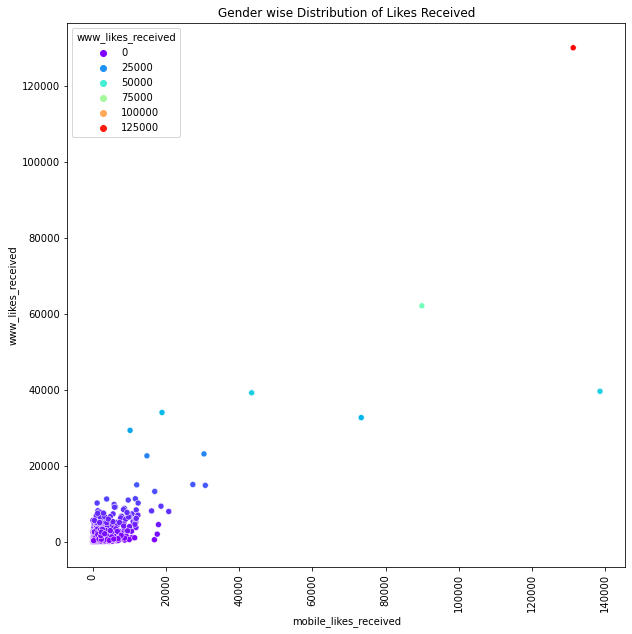

In [178]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="mobile_likes_received", y="www_likes_received", hue="www_likes_received", data=data, palette="rainbow")
plt.title("Gender wise Distribution of Likes Received")
plt.xticks(rotation="vertical")
plt.show()

In [332]:
data_mob.age_group.value_counts(normalize=True), data_www.age_group.value_counts(normalize=True)

(20-30      0.335653
 13-19      0.227032
 31-40      0.126824
 51-65      0.118598
 Over 65    0.101021
 41-50      0.090872
 Name: age_group, dtype: float64,
 20-30      0.254315
 13-19      0.228134
 51-65      0.177850
 Over 65    0.153852
 31-40      0.095358
 41-50      0.090490
 Name: age_group, dtype: float64)

In [336]:
data_only_mob_likes=data[(data["mobile_likes"]==0) & (data["www_likes"]!=0)]
data_only_mob_likes.to_csv("Dataset_only_www_likes.csv")

In [339]:
data_only_web_likes=data[(data["mobile_likes"]!=0) & (data["www_likes"]==0)]
data_only_web_likes.to_csv("Dataset_only_mob_likes.csv")